In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import *

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(
    channel='ibm_quantum')




In [4]:
#importing pulse related packages

from qiskit import pulse
from qiskit.pulse import ControlChannel, DriveChannel, Play
from qiskit.pulse.library import Drag
from qiskit.circuit import Parameter, QuantumCircuit

# from qiskit_ibm_provider import IBMProvider

import numpy as np
import pandas as pd

## Backend details ##

In [4]:
# Backend details, use IBMqiskitruntimeservice now since IBMProvider got deprecated.


provider = IBMProvider()
provider.backends()
backend = provider.get_backend('ibm_hanoi')


conf = backend.configuration()
defs = backend.defaults()
props = backend.properties()

In [37]:
backend

<IBMBackend('ibm_hanoi')>

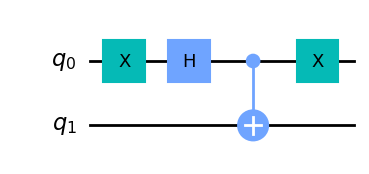

In [24]:
# Circuit diagram corresponding to gs 2 (c)

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.x(0)

transpile(qc,initial_layout=[1,2])
qc.draw("mpl",idle_wires=False,filename="gs21.pdf")


In [40]:
#Fidelity circuits for gs 2 c. Since the state is restricted to 0-1 manifold. We dont need 4 circuits here (unlike gs 2 (a), gs 2 (b))

qc = QuantumCircuit(2,2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.x(0)

qc.measure_all()


In [41]:
# Job execution

from math import pi
from qiskit_ibm_runtime import Session, Estimator, Sampler, Options
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options
service = QiskitRuntimeService()

options = Options(simulator={"seed_simulator": 42},resilience_level=0) 

with Session(service=service, backend='ibm_hanoi'):
    sampler = Sampler() # Define sampler with options above
    job = sampler.run(circuits=[transpile(qc,backend,initial_layout=[1,2])],skip_transpilation=True, shots =10**3) # build your code here
    print(job.job_id())

qiskit_runtime_service.__init__:INFO:2024-04-18 04:49:20,883: Default instance: ibm-q-ornl/ornl/cph140
base_primitive._run_primitive:INFO:2024-04-18 04:49:24,000: Submitting job using options {'optimization_level': 1, 'resilience_level': 1, 'transpilation': {'skip_transpilation': True, 'optimization_settings': {'level': 1}}, 'resilience': {'level': 1}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING'}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}}


crgacn2qzd5000886cn0


In [ ]:
#Job results retrieval

In [5]:
from math import pi
from qiskit_ibm_runtime import Session, Estimator, Sampler, Options
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options



job = service.job('crgacn2qzd5000886cn0')

Result = job.result()
Result;

In [8]:
#Shots 
print(Result)

SamplerResult(quasi_dists=[{0: -0.000867587675595, 4: 0.495538879521627, 8: 0.508215411982771, 12: -0.002886703828803}], metadata=[{'shots': 1000, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.1845512537354415, 'readout_mitigation_time': 0.0844051989261061}])


In [15]:
# Ground state probabilioty wave vector

P =  [-0.000867587675595, 0.495538879521627, 0.0, 0.508215411982771, 0 , -0.002886703828803,0, 0, 0]

In [16]:
# Theoretical ground state probability wave vector

Q = [0,0.5,0,0.5,0,0,0,0,0]

In [19]:
#Hellinger fidelity computation

def hellinger_fidelity(p, q):
    """
    Compute the Hellinger Fidelity between two probability distributions p and q.
    
    Parameters:
    p (list or numpy array): First probability distribution.
    q (list or numpy array): Second probability distribution.
    
    Returns:
    float: Hellinger Fidelity between the distributions.
    """
    p = np.abs(p)
    q = np.abs(q)
    
    assert len(p) == len(q), "Distributions must have the same length"
    
    return 100* (np.sum(np.sqrt(p*q)))**2


fidelity = hellinger_fidelity(P, Q)
print("Hellinger Fidelity %:", fidelity)


Hellinger Fidelity %: 100.37142665489418
